# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key savefig.frameon in file C:\Users\John\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\John\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\John\anaconda3\envs\dev\lib\site-packages

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="bitcoin",
    language="en")

btc_news['totalResults']


8651

In [6]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="ethereum",
    language="en")

eth_news['totalResults']

4725

In [10]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        neutral = sentiment["neu"]
        negative = sentiment["neg"]
        
        btc_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": positive,
            "negative": negative,
            "neutral": neutral
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)

btc_df.columns = ["date", "article", "compound", "positive", "negative", "neutral"]

btc_df.head()

,date,article,compound,positive,negative,neutral
0,2022-04-08,Its set to open later this year\r\nIf you buy ...,-0.4404,0.000,0.081,0.919
1,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-04-05,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943
4,2022-04-06,The wallet will have USB-C and a fingerprint r...,-0.4404,0.000,0.088,0.912


In [14]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        neutral = sentiment["neu"]
        negative = sentiment["neg"]
        
        eth_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": positive,
            "negative": negative,
            "neutral": neutral
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

eth_df.columns = ["date", "article", "compound", "positive", "negative", "neutral"]

eth_df.head()

,date,article,compound,positive,negative,neutral
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
1,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
2,2022-04-03,"This week, the cryptocurrency network Ronin di...",-0.4215,0.051,0.098,0.851
3,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812
4,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879


In [15]:
# Describe the Bitcoin Sentiment
btc_df.describe()


,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,-0.013850,0.058600,0.053600,0.88780
std,0.401941,0.063568,0.044219,0.06748
min,-0.542300,0.000000,0.000000,0.77200
25%,-0.350550,0.000000,0.000000,0.84250
50%,-0.064000,0.050500,0.065500,0.90400
75%,0.196075,0.084250,0.081250,0.92725
max,0.735100,0.197000,0.143000,1.00000


In [16]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.007765,0.077300,0.065700,0.856950
std,0.480410,0.102811,0.070344,0.113815
min,-0.784500,0.000000,0.000000,0.594000
25%,-0.278900,0.000000,0.000000,0.809750
50%,-0.127900,0.054000,0.063000,0.868500
75%,0.303775,0.085000,0.086750,0.937000
max,0.932700,0.349000,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Ethereum with a positive mean score of 0.0773 vs a bitcoin positive mean score of 0.0586**

Q: Which coin had the highest compound score?

A: **Ethereum with a positive compound score of 0.9327 vs a bitcoin positive compound score of 0.7351**

Q. Which coin had the highest positive score?

A: **Ethereum with the highest positive score of 0.349 vs a bitcoin highest positive score of 0.197**

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [21]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [27]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Expand the default stopwords list if necessary
sw_addons = {'today','found','next','follow',''}

In [30]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return tokens

In [31]:
# Create a new tokens column for Bitcoin
btc_word_tokenized = []
for text in btc_df.article:
   
    words = []
    words = words + tokenizer(text)
    btc_word_tokenized.append(words)
    
print(btc_word_tokenized)

btc_df["tokens"]=btc_word_tokenized
btc_df.head()

[['set', 'open', 'later', 'yearif', 'buy', 'something', 'verge', 'link', 'vox', 'media', 'may', 'earn', 'commission', 'see', 'ethic', 'statementillustration', 'alex', 'castro', 'vergeblock', 'blockstream', 'char'], ['wikipedia', 'editor', 'voted', 'favor', 'dropping', 'cryptocurrency', 'wikimedia', 'foundations', 'donation', 'option', 'ars', 'technica', 'report', 'editor', 'online', 'encyclopedia', 'called', 'gorillawarfare', 'char'], ['warren', 'buffett', 'ha', 'always', 'bitcoin', 'skeptic', 'billionaire', 'investor', 'harsh', 'word', 'yet', 'cryptocurrency', 'weekend', 'buffett', 'made', 'clear', 'opposition', 'crypt', 'char'], ['might', 'heard', 'crypto', 'twitter', 'corner', 'social', 'network', 'account', 'bored', 'apes', 'profile', 'picture', 'post', 'rife', 'talk', 'token', 'blockchains', 'buying', 'bitcoin', 'di', 'char'], ['wallet', 'usbc', 'fingerprint', 'reader', 'image', 'jessedorogusker', 'twitter', 'may', 'seen', 'bitcoin', 'hardware', 'wallet', 'jack', 'dorseys', 'block

,date,article,compound,positive,negative,neutral,tokens
0,2022-04-08,Its set to open later this year\r\nIf you buy ...,-0.4404,0.000,0.081,0.919,"[set, open, later, yearif, buy, something, ver..."
1,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912,"[wikipedia, editor, voted, favor, dropping, cr..."
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, ha, always, bitcoin, skeptic..."
3,2022-04-05,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943,"[might, heard, crypto, twitter, corner, social..."
4,2022-04-06,The wallet will have USB-C and a fingerprint r...,-0.4404,0.000,0.088,0.912,"[wallet, usbc, fingerprint, reader, image, jes..."


In [33]:
# Create a new tokens column for Ethereum
eth_word_tokenized = []
for text in eth_df.article:
   
    words = []
    words = words + tokenizer(text)
    eth_word_tokenized.append(words)
    
print(eth_word_tokenized)

eth_df["tokens"]=eth_word_tokenized
eth_df.head()

[['us', 'department', 'treasury', 'say', 'lazarus', 'behind', 'attackthe', 'us', 'treasury', 'department', 'blame', 'north', 'korean', 'hacking', 'group', 'lazarus', 'stealing', 'million', 'cryptocurrency', 'ronin', 'networ', 'char'], ['poster', 'participating', 'including', 'story', 'authormore', 'longtime', 'wikipedia', 'editor', 'requested', 'wikimedia', 'foundation', 'stop', 'accepting', 'cryptocurrency', 'donationsthe', 'foundatio', 'char'], ['week', 'cryptocurrency', 'network', 'ronin', 'disclosed', 'breach', 'attacker', 'made', 'million', 'worth', 'ethereum', 'usdc', 'stablecoin', 'incident', 'one', 'biggest', 'heist', 'char'], ['opera', 'launched', 'dedicated', 'crypto', 'browser', 'beta', 'back', 'january', 'promising', 'make', 'web', 'accessible', 'web', 'website', 'company', 'released', 'browser', 'windows', 'mac', 'android', 'user', 'char'], ['multibillion', 'dollar', 'cryptocurrency', 'company', 'ha', 'apologised', 'user', 'sale', 'metaverse', 'land', 'sparked', 'frenzy', 

,date,article,compound,positive,negative,neutral,tokens
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681,"[us, department, treasury, say, lazarus, behin..."
1,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844,"[poster, participating, including, story, auth..."
2,2022-04-03,"This week, the cryptocurrency network Ronin di...",-0.4215,0.051,0.098,0.851,"[week, cryptocurrency, network, ronin, disclos..."
3,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812,"[opera, launched, dedicated, crypto, browser, ..."
4,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [34]:
from collections import Counter
from nltk import ngrams

In [38]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = Counter(ngrams([item for elem in btc_word_tokenized for item in elem], n=2))
print(list(btc_ngram))

[('set', 'open'), ('open', 'later'), ('later', 'yearif'), ('yearif', 'buy'), ('buy', 'something'), ('something', 'verge'), ('verge', 'link'), ('link', 'vox'), ('vox', 'media'), ('media', 'may'), ('may', 'earn'), ('earn', 'commission'), ('commission', 'see'), ('see', 'ethic'), ('ethic', 'statementillustration'), ('statementillustration', 'alex'), ('alex', 'castro'), ('castro', 'vergeblock'), ('vergeblock', 'blockstream'), ('blockstream', 'char'), ('char', 'wikipedia'), ('wikipedia', 'editor'), ('editor', 'voted'), ('voted', 'favor'), ('favor', 'dropping'), ('dropping', 'cryptocurrency'), ('cryptocurrency', 'wikimedia'), ('wikimedia', 'foundations'), ('foundations', 'donation'), ('donation', 'option'), ('option', 'ars'), ('ars', 'technica'), ('technica', 'report'), ('report', 'editor'), ('editor', 'online'), ('online', 'encyclopedia'), ('encyclopedia', 'called'), ('called', 'gorillawarfare'), ('gorillawarfare', 'char'), ('char', 'warren'), ('warren', 'buffett'), ('buffett', 'ha'), ('ha',

In [39]:
# Generate the Ethereum N-grams where N=2
eth_ngram = Counter(ngrams([item for elem in eth_word_tokenized for item in elem], n=2))
print(list(eth_ngram))

[('us', 'department'), ('department', 'treasury'), ('treasury', 'say'), ('say', 'lazarus'), ('lazarus', 'behind'), ('behind', 'attackthe'), ('attackthe', 'us'), ('us', 'treasury'), ('treasury', 'department'), ('department', 'blame'), ('blame', 'north'), ('north', 'korean'), ('korean', 'hacking'), ('hacking', 'group'), ('group', 'lazarus'), ('lazarus', 'stealing'), ('stealing', 'million'), ('million', 'cryptocurrency'), ('cryptocurrency', 'ronin'), ('ronin', 'networ'), ('networ', 'char'), ('char', 'poster'), ('poster', 'participating'), ('participating', 'including'), ('including', 'story'), ('story', 'authormore'), ('authormore', 'longtime'), ('longtime', 'wikipedia'), ('wikipedia', 'editor'), ('editor', 'requested'), ('requested', 'wikimedia'), ('wikimedia', 'foundation'), ('foundation', 'stop'), ('stop', 'accepting'), ('accepting', 'cryptocurrency'), ('cryptocurrency', 'donationsthe'), ('donationsthe', 'foundatio'), ('foundatio', 'char'), ('char', 'week'), ('week', 'cryptocurrency'),

In [40]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [43]:
# Use token_count to get the top 10 words for Bitcoin
token_count([item for elem in btc_word_tokenized for item in elem], 10)

[('char', 20),
 ('bitcoin', 14),
 ('cryptocurrency', 5),
 ('ha', 5),
 ('million', 5),
 ('world', 5),
 ('april', 5),
 ('company', 4),
 ('reuters', 4),
 ('editor', 3)]

In [44]:
# Use token_count to get the top 10 words for Ethereum
token_count([item for elem in eth_word_tokenized for item in elem], 10)

[('char', 20),
 ('cryptocurrency', 8),
 ('ethereum', 7),
 ('ha', 7),
 ('april', 5),
 ('year', 5),
 ('us', 4),
 ('browser', 4),
 ('reuters', 4),
 ('north', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

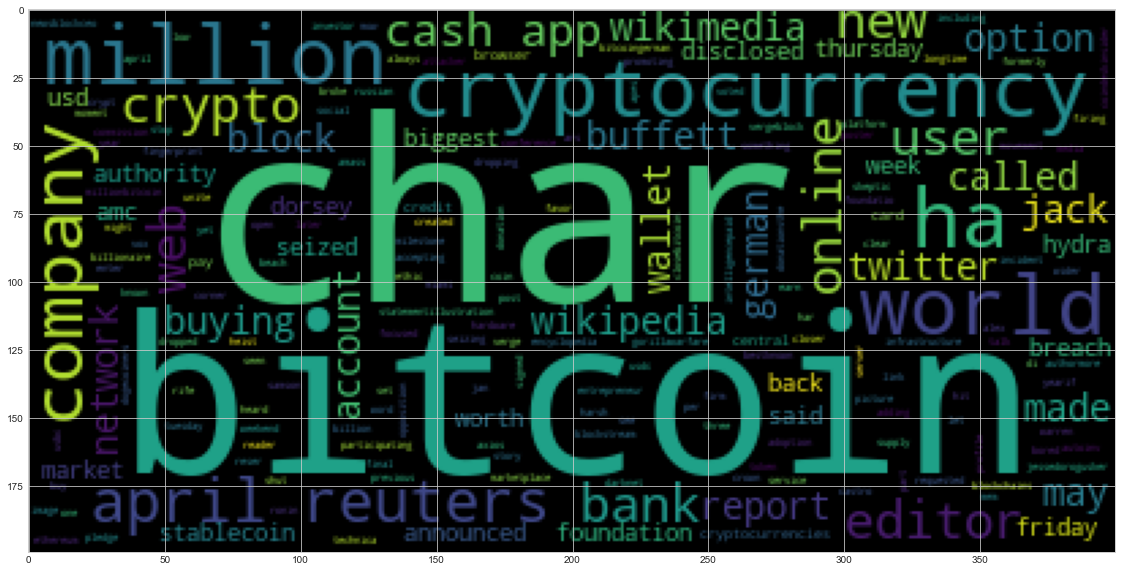

In [47]:
# Generate the Bitcoin word cloud
btc_wc_str = ' '.join([str(elem) for elem in [item for elem in btc_word_tokenized for item in elem]])
btc_wc = WordCloud().generate(btc_wc_str)
plt.imshow(btc_wc)

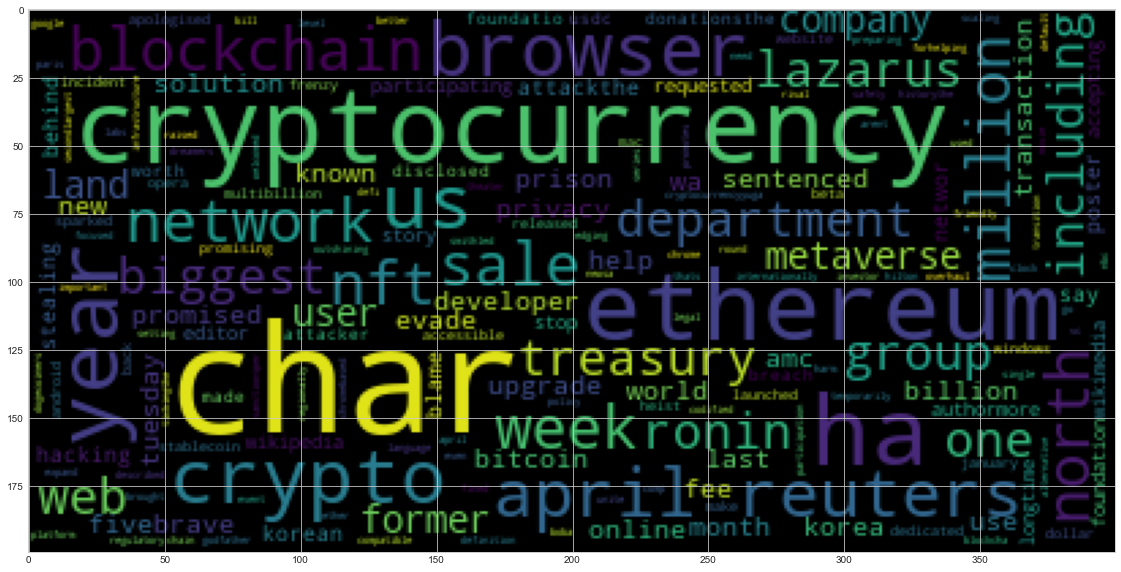

In [48]:
# Generate the Ethereum word cloud
eth_wc_str = ' '.join([str(elem) for elem in [item for elem in eth_word_tokenized for item in elem]])
eth_wc = WordCloud().generate(eth_wc_str)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [49]:
import spacy
from spacy import displacy

In [50]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [51]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [52]:
# Concatenate all of the Bitcoin text together
btc_text = []
for article in btc_df.article:
    btc_text.append(article)
    
btc_text_str = ' '.join([str(elem) for elem in btc_text])
print(btc_text_str)

Its set to open later this year
If you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.
Illustration by Alex Castro / The Verge
Block and Blockstream, a … [+1336 chars] Wikipedia editors have voted in favor of dropping cryptocurrency from the Wikimedia Foundation's donation options. As Ars Technica reports, an editor for the online encyclopedia called GorillaWarfare… [+1577 chars] Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars] You might have heard of crypto Twitter, the corner of the social network where accounts have Bored Apes as profile pictures, posts are rife with talk of tokens, blockchains, and buying the Bitcoin di… [+3133 chars] The wallet will have USB-C and a fingerprint reader. | Image: @JesseDorogusker on Twitter

 

 We may have just seen the Bitcoin hardware walle

In [53]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text_str)

# Add a title to the document
btc_ner.user_data['title'] = "BTC Named Entity Recognition"

In [54]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [55]:
# List all Entities
btc_ent = [ent.text for ent in btc_ner.ents if ent.label_ in ['GPE', 'ORG']]
btc_ent

['Vox Media',
 'Verge',
 'Wikipedia',
 "the Wikimedia Foundation's",
 'GorillaWarfare',
 'USB-C',
 'Bitcoin',
 'Hydra',
 'Reuters',
 'MIAMI BEACH',
 'Reuters',
 'Jan3',
 'CoinDesk',
 'Intelligence',
 'Wikipedia',
 'the Wikimedia Foundation',
 'Ronin',
 'Ethereum',
 'USDC',
 'Reuters',
 '+339',
 'AMC',
 'AMC',
 'moviego',
 'Windows, Mac',
 'Android',
 'US',
 'SEC',
 'The Central African Republic',
 'El Salvador',
 'Reuters',
 'The Swiss National Bank']

---

### Ethereum NER

In [56]:
# Concatenate all of the Ethereum text together
eth_text = []
for article in eth_df.article:
    eth_text.append(article)
    
eth_text_str = ' '.join([str(elem) for elem in eth_text])
print(eth_text_str)

The US Department of Treasury says Lazarus is behind the attack
The US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars] 18 with 15 posters participating, including story author
More than 200 long-time Wikipedia editors have requested that the Wikimedia Foundation stop accepting cryptocurrency donations. The foundatio… [+4016 chars] This week, the cryptocurrency network Ronin disclosed a breach in which attackers made off with $540 million worth of Ethereum and USDC stablecoin. The incident, which is one of the biggest heists in… [+3084 chars] Opera launched its dedicated "Crypto Browser" into beta back in January, promising to make Web3 as accessible as any Web2 website. The company released the browser for Windows, Mac and Android users … [+1563 chars] A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily broug

In [57]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text_str)

# Add a title to the document
eth_ner.user_data['title'] = "ETH Named Entity Recognition"

In [58]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [59]:
# List all Entities
eth_ent = [ent.text for ent in eth_ner.ents if ent.label_ in ['GPE', 'ORG']]
eth_ent

['The US Department of Treasury',
 'The US Treasury Department',
 'Lazarus',
 'Wikipedia',
 'the Wikimedia Foundation',
 'Ronin',
 'Ethereum',
 'USDC',
 'Windows, Mac',
 'Android',
 'Ethereum',
 'Reuters',
 'Dreamers VC',
 'Ethereum',
 'North Korea',
 'US',
 'NBC News',
 'Reuters',
 'Chrome',
 'Brave',
 'AMC',
 'AMC',
 'moviego',
 'the Ukrainian Computer Emergency Response Team',
 'Russia',
 'Ethereum',
 'Merge',
 "Georgios Konstantopoulos'",
 'Ethereum',
 'Dark Forest',
 'Reuters',
 '+339',
 'NFT',
 'NFT',
 'Ethereum',
 'Reuters',
 'North Korea',
 'U.S.']

---